# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

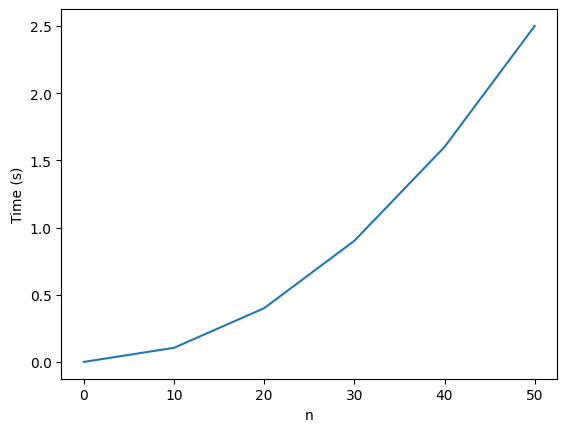

In [93]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

Text(0, 0.5, 'Time (s)')

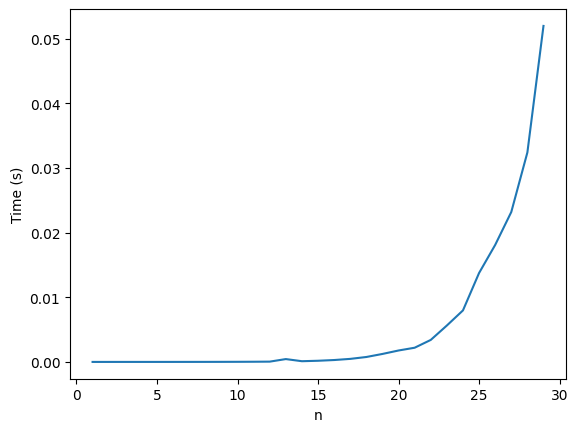

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def recursive(n):
    if n <= 2:
        return 1
    
    return recursive(n - 1) + recursive(n - 2)

def timeit(n, iterations):
    average = 0
    for i in range(iterations):
        start = time.time()
        recursive(n)
        end = time.time()
        average += end - start
    return average / iterations

N = [i for i in range(1, 30)]
T = [timeit(n, 1) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time (s)')

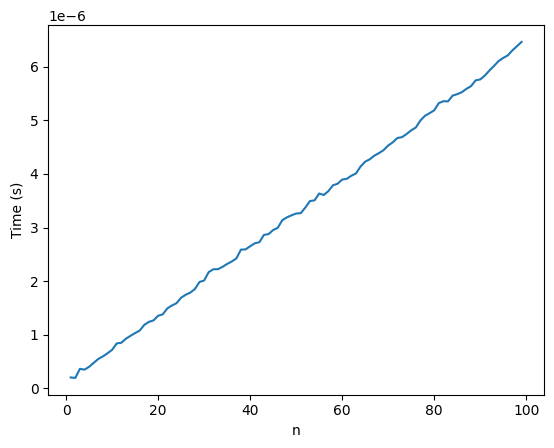

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def table(n):
    x = [1,1]
    for i in range(1, n - 1):
        x.append(x[i] + x[i - 1])
    
    return x[n - 1], x

def timeit(n, iterations):
    average = 0
    for i in range(iterations):
        start = time.time()
        table(n)
        end = time.time()
        average += end - start
    return average / iterations

N = [i for i in range(1, 100)]
T = [timeit(n, 1000) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time (s)')

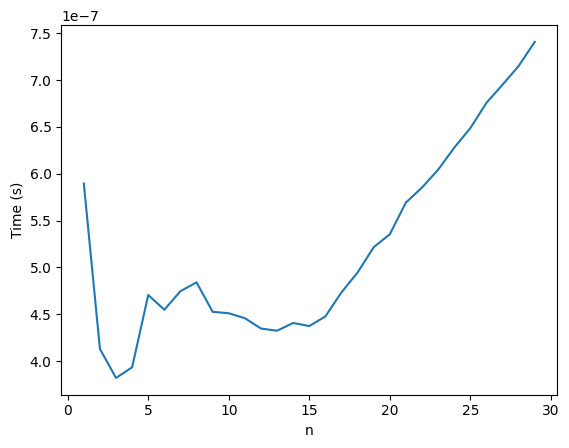

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def keeplast2(n):
    p = c = 1
    for i in range(1, n - 1):
        new = p + c
        p = c
        c = new
    
    return c

def timeit(n, iterations):
    average = 0
    for i in range(iterations):
        start = time.time()
        keeplast2(n)
        end = time.time()
        average += end - start
    return average / iterations

N = [i for i in range(1, 30)]
T = [timeit(n, 10000) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time (s)')

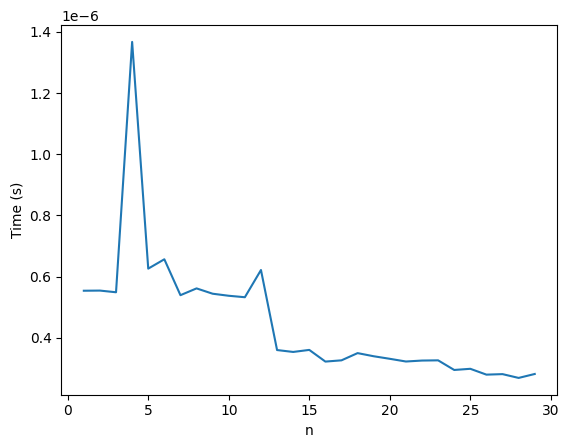

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def analytic(n):
    phi = (1 + 5 ** 0.5) / 2
    
    return (phi ** n - (1 - phi) ** n) / 5 ** 0.5

def timeit(n, iterations):
    average = 0
    for i in range(iterations):
        start = time.time()
        analytic(n)
        end = time.time()
        average += end - start
    return average / iterations

N = [i for i in range(1, 30)]
T = [timeit(n, 1000) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')